**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


**Load DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/dataset/SVR1.xlsx")
df

,pIC50,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
0,4.004892,3185.729309,2876.088125,4441.404416,3427.936330,2637.998678,2575.023934,2133.887869,1076.624293,280.910325,...,34.715388,67.267805,67.267038,76.594113,74.520725,73.946857,186,241,107.256765,314
1,3.420102,3331.009494,3030.447366,4720.873762,3710.397420,2858.969583,2736.475463,2289.243014,1574.660658,862.354864,...,37.453804,81.231172,81.232075,84.572262,83.822201,82.270662,220,279,93.763699,387
2,3.468904,3545.652569,3092.170858,4873.569882,3896.370449,2890.350064,2791.106667,2368.104928,1869.479352,1036.813096,...,57.985166,79.651701,79.460572,82.709641,80.044235,109.240714,220,279,93.763699,387
3,3.806041,9569.362461,3823.707981,6336.644128,5482.230378,3744.672870,3522.643790,3161.034893,4553.649909,3595.883557,...,33.389897,77.400767,77.325671,80.524993,80.400447,79.413827,220,279,93.763699,387
4,4.070837,5697.102181,3703.453849,6096.135864,5600.503248,5238.886308,4541.317714,4029.437781,3180.272769,1728.059839,...,32.354072,84.449391,84.376610,86.640599,86.408366,85.583456,233,314,98.712348,448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,6668.470331,6404.219041,9994.750661,10131.879690,9802.293221,7997.342023,7228.454283,8693.282131,6452.770527,...,75.782400,1092.727086,1108.832897,285.251497,445.191136,270.567764,746,1255,369.668317,2371
103,4.274088,7187.420373,6616.618562,11073.894200,10680.390820,10546.238680,9348.022433,9369.170142,9300.666765,7698.804628,...,141.233623,1212.536907,1132.651656,296.887300,561.920813,281.382472,734,1302,380.833196,2527
104,6.677781,6999.719454,6898.282224,10681.619710,11290.596320,11758.754530,9836.142316,8894.782234,9296.988827,7771.035326,...,92.266983,392.515890,392.417139,1242.206336,489.306538,385.255749,864,1396,565.492111,3092
105,4.486782,7924.156767,6817.901903,10822.116390,11476.392050,11530.514270,9231.998807,9860.508331,9736.840813,8204.284836,...,74.788684,786.653644,775.203062,294.473231,448.740435,278.934344,734,1314,383.175264,2527


In [ ]:
print(df.columns)

Index(['pIC50', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m',
       'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'AATS3v', 'ATS6v', 'ATS7v', 'ATS8v',
       'ATS2i', 'ATS3i', 'ATS5i', 'ATS6i', 'ATS8i', 'ATS3s', 'ATS7s', 'ATS8s',
       'AATS0v', 'AATS1v', 'AATS2v', 'AATS3v.1', 'AATS4v', 'AATS5v', 'AATS6v',
       'ATSC0m', 'ATSC3m', 'ATSC5m', 'ATSC6m', 'ATSC0v', 'ATSC2v', 'ATSC3v',
       'ATSC5v', 'ATSC7v', 'ATSC8v', 'ATSC0i', 'VR1_DzZ', 'VR1_Dzm', 'VR1_Dzv',
       'VR1_Dze', 'VR1_Dzp', 'ECCEN', 'TPC', 'VR1_D', 'WPATH'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pIC50     107 non-null    float64
 1   ATS0m     107 non-null    float64
 2   ATS1m     107 non-null    float64
 3   ATS2m     107 non-null    float64
 4   ATS3m     107 non-null    float64
 5   ATS4m     107 non-null    float64
 6   ATS5m     107 non-null    float64
 7   ATS6m     107 non-null    float64
 8   ATS7m     107 non-null    float64
 9   ATS8m     107 non-null    float64
 10  ATS0v     107 non-null    float64
 11  ATS1v     107 non-null    float64
 12  AATS3v    107 non-null    float64
 13  ATS6v     107 non-null    float64
 14  ATS7v     107 non-null    float64
 15  ATS8v     107 non-null    float64
 16  ATS2i     107 non-null    float64
 17  ATS3i     107 non-null    float64
 18  ATS5i     107 non-null    float64
 19  ATS6i     107 non-null    float64
 20  ATS8i     107 non-null    float6

**Checking for Null Values**

In [ ]:
df.isnull()

,pIC50,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pIC50       0
ATS0m       0
ATS1m       0
ATS2m       0
ATS3m       0
ATS4m       0
ATS5m       0
ATS6m       0
ATS7m       0
ATS8m       0
ATS0v       0
ATS1v       0
AATS3v      0
ATS6v       0
ATS7v       0
ATS8v       0
ATS2i       0
ATS3i       0
ATS5i       0
ATS6i       0
ATS8i       0
ATS3s       0
ATS7s       0
ATS8s       0
AATS0v      0
AATS1v      0
AATS2v      0
AATS3v.1    0
AATS4v      0
AATS5v      0
AATS6v      0
ATSC0m      0
ATSC3m      0
ATSC5m      0
ATSC6m      0
ATSC0v      0
ATSC2v      0
ATSC3v      0
ATSC5v      0
ATSC7v      0
ATSC8v      0
ATSC0i      0
VR1_DzZ     0
VR1_Dzm     0
VR1_Dzv     0
VR1_Dze     0
VR1_Dzp     0
ECCEN       0
TPC         0
VR1_D       0
WPATH       0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pIC50,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
0,4.004892,3185.729309,2876.088125,4441.404416,3427.936330,2637.998678,2575.023934,2133.887869,1076.624293,280.910325,...,34.715388,67.267805,67.267038,76.594113,74.520725,73.946857,186,241,107.256765,314
1,3.420102,3331.009494,3030.447366,4720.873762,3710.397420,2858.969583,2736.475463,2289.243014,1574.660658,862.354864,...,37.453804,81.231172,81.232075,84.572262,83.822201,82.270662,220,279,93.763699,387
2,3.468904,3545.652569,3092.170858,4873.569882,3896.370449,2890.350064,2791.106667,2368.104928,1869.479352,1036.813096,...,57.985166,79.651701,79.460572,82.709641,80.044235,109.240714,220,279,93.763699,387
3,3.806041,9569.362461,3823.707981,6336.644128,5482.230378,3744.672870,3522.643790,3161.034893,4553.649909,3595.883557,...,33.389897,77.400767,77.325671,80.524993,80.400447,79.413827,220,279,93.763699,387
4,4.070837,5697.102181,3703.453849,6096.135864,5600.503248,5238.886308,4541.317714,4029.437781,3180.272769,1728.059839,...,32.354072,84.449391,84.376610,86.640599,86.408366,85.583456,233,314,98.712348,448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,6668.470331,6404.219041,9994.750661,10131.879690,9802.293221,7997.342023,7228.454283,8693.282131,6452.770527,...,75.782400,1092.727086,1108.832897,285.251497,445.191136,270.567764,746,1255,369.668317,2371
103,4.274088,7187.420373,6616.618562,11073.894200,10680.390820,10546.238680,9348.022433,9369.170142,9300.666765,7698.804628,...,141.233623,1212.536907,1132.651656,296.887300,561.920813,281.382472,734,1302,380.833196,2527
104,6.677781,6999.719454,6898.282224,10681.619710,11290.596320,11758.754530,9836.142316,8894.782234,9296.988827,7771.035326,...,92.266983,392.515890,392.417139,1242.206336,489.306538,385.255749,864,1396,565.492111,3092
105,4.486782,7924.156767,6817.901903,10822.116390,11476.392050,11530.514270,9231.998807,9860.508331,9736.840813,8204.284836,...,74.788684,786.653644,775.203062,294.473231,448.740435,278.934344,734,1314,383.175264,2527


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pIC50     107 non-null    float64
 1   ATS0m     107 non-null    float64
 2   ATS1m     107 non-null    float64
 3   ATS2m     107 non-null    float64
 4   ATS3m     107 non-null    float64
 5   ATS4m     107 non-null    float64
 6   ATS5m     107 non-null    float64
 7   ATS6m     107 non-null    float64
 8   ATS7m     107 non-null    float64
 9   ATS8m     107 non-null    float64
 10  ATS0v     107 non-null    float64
 11  ATS1v     107 non-null    float64
 12  AATS3v    107 non-null    float64
 13  ATS6v     107 non-null    float64
 14  ATS7v     107 non-null    float64
 15  ATS8v     107 non-null    float64
 16  ATS2i     107 non-null    float64
 17  ATS3i     107 non-null    float64
 18  ATS5i     107 non-null    float64
 19  ATS6i     107 non-null    float64
 20  ATS8i     107 non-null    float6

In [ ]:
df2.describe()

,pIC50,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.216168,7243.575461,6234.727661,9674.769435,9615.930252,9297.378654,8964.516701,8085.481386,8261.530388,7287.360896,...,86.025026,403.578292,426.526287,351.103231,401.185396,359.792421,796.934579,990.233645,397.949614,2755.074766
std,0.725320,2208.805438,1044.079076,1570.341410,1827.760415,2065.641842,2179.163700,2240.961184,2421.064311,2835.429371,...,24.255136,239.716603,368.338983,174.857395,246.191759,183.071791,239.215474,280.012924,201.727698,1130.677228
min,3.301030,3185.729309,2876.088125,4441.404416,3427.936330,2637.998678,2575.023934,2133.887869,1076.624293,280.910325,...,32.354072,67.267805,67.267038,76.594113,74.520725,73.946857,186.000000,241.000000,93.763699,314.000000
25%,3.733644,6421.863532,6107.226594,9474.300075,9091.060649,8793.275378,8177.669125,7110.046697,6956.713993,5880.093039,...,72.767111,284.812022,284.773475,286.457291,288.751714,282.134843,727.500000,893.000000,311.039535,2290.500000
50%,4.069153,6991.693552,6452.373994,10065.074870,9851.788682,9560.440591,9012.344147,7939.501326,8839.868413,6922.580279,...,85.313015,334.407370,334.186159,316.868697,360.381646,308.105654,849.000000,984.000000,359.911835,2789.000000
75%,4.489463,7607.115586,6851.082900,10640.541385,10725.828455,10509.812685,10032.504954,9694.665780,9819.686766,9698.246167,...,100.978513,421.076174,421.185570,365.151751,446.965786,412.388745,961.000000,1161.000000,426.207299,3595.500000
max,6.677781,21469.670680,7595.218400,11854.924740,12601.452590,13712.973170,13123.665360,13358.896750,12403.632080,12923.938590,...,160.457522,1358.274114,3342.142192,1265.595766,1886.624347,1446.260471,1178.000000,1456.000000,1321.052702,5008.000000


In [ ]:
scale = StandardScaler()
df2_sc = scale.fit_transform(df2)
df2_sc = pd.DataFrame(df2_sc, columns = df2.columns)

In [ ]:
df2_sc.head()

,pIC50,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
0,-0.292658,-1.845768,-3.231982,-3.348312,-3.401493,-3.239051,-2.945883,-2.668320,-2.981630,-2.482665,...,-2.125368,-1.409552,-0.979939,-1.577291,-1.333115,-1.568733,-2.565928,-2.688303,-1.447797,-2.169109
1,-1.102702,-1.779685,-3.083444,-3.169507,-3.246226,-3.131573,-2.871446,-2.598668,-2.774952,-2.276636,...,-2.011937,-1.351029,-0.941847,-1.531449,-1.295156,-1.523051,-2.423127,-2.551956,-1.515000,-2.104242
2,-1.035102,-1.682052,-3.024048,-3.071812,-3.143998,-3.116310,-2.846258,-2.563312,-2.652607,-2.214819,...,-1.161478,-1.357649,-0.946680,-1.542152,-1.310574,-1.375039,-2.423127,-2.551956,-1.515000,-2.104242
3,-0.568104,1.057917,-2.320098,-2.135736,-2.272263,-2.700776,-2.508982,-2.207812,-1.538716,-1.308038,...,-2.180273,-1.367083,-0.952503,-1.554704,-1.309120,-1.538730,-2.423127,-2.551956,-1.515000,-2.104242
4,-0.201312,-0.703435,-2.435817,-2.289613,-2.207249,-1.974007,-2.039321,-1.818475,-2.108647,-1.969882,...,-2.223180,-1.337541,-0.933270,-1.519565,-1.284602,-1.504871,-2.368527,-2.426374,-1.490353,-2.050038


In [ ]:
df2_sc.describe()

,pIC50,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,...,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02
mean,5.260589e-16,-4.741794e-16,1.396598e-15,3.112775e-17,-5.478484e-16,-2.531724e-16,1.901387e-16,-3.548563e-16,6.350061e-16,4.202246e-16,...,-1.525260e-15,-1.701650e-16,-2.386461e-16,-3.527811e-16,-2.168566e-16,3.434428e-16,-2.241198e-16,-1.535636e-16,-5.992092e-16,6.329309e-17
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,...,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00
min,-1.267640e+00,-1.845768e+00,-3.231982e+00,-3.348312e+00,-3.401493e+00,-3.239051e+00,-2.945883e+00,-2.668320e+00,-2.981630e+00,-2.482665e+00,...,-2.223180e+00,-1.409552e+00,-9.799394e-01,-1.577291e+00,-1.333115e+00,-1.568733e+00,-2.565928e+00,-2.688303e+00,-1.515000e+00,-2.169109e+00
25%,-6.683871e-01,-3.737671e-01,-1.226929e-01,-1.282605e-01,-2.885168e-01,-2.451904e-01,-3.627770e-01,-4.373235e-01,-5.414795e-01,-4.986512e-01,...,-5.491746e-01,-4.977760e-01,-3.866544e-01,-3.714464e-01,-4.588406e-01,-4.261881e-01,-2.916255e-01,-3.488811e-01,-4.328561e-01,-4.128154e-01
50%,-2.036441e-01,-1.145720e-01,2.094387e-01,2.497178e-01,1.296496e-01,1.279505e-01,2.205090e-02,-6.544827e-02,2.400017e-01,-1.292563e-01,...,-2.949321e-02,-2.899108e-01,-2.518731e-01,-1.967068e-01,-1.665197e-01,-2.836592e-01,2.186750e-01,-2.236675e-02,-1.894474e-01,3.014555e-02
75%,3.785654e-01,1.653613e-01,5.931119e-01,6.179018e-01,6.101025e-01,5.897148e-01,4.923972e-01,7.214570e-01,6.466119e-01,8.542730e-01,...,6.194093e-01,7.333754e-02,-1.456769e-02,8.072082e-02,1.868293e-01,2.886509e-01,6.890754e-01,6.127216e-01,1.407376e-01,7.467915e-01
max,3.409799e+00,6.470937e+00,1.309185e+00,1.394865e+00,1.641119e+00,2.147698e+00,1.917580e+00,2.364267e+00,1.718911e+00,1.997265e+00,...,3.083172e+00,4.001344e+00,7.952828e+00,5.254545e+00,6.062060e+00,5.962584e+00,1.600476e+00,1.671202e+00,4.597520e+00,2.001922e+00


**Input and Output Preparation**

In [ ]:
X = df2_sc.drop(['pIC50'],axis = 1)
X

,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
0,-1.845768,-3.231982,-3.348312,-3.401493,-3.239051,-2.945883,-2.668320,-2.981630,-2.482665,-2.880886,...,-2.125368,-1.409552,-0.979939,-1.577291,-1.333115,-1.568733,-2.565928,-2.688303,-1.447797,-2.169109
1,-1.779685,-3.083444,-3.169507,-3.246226,-3.131573,-2.871446,-2.598668,-2.774952,-2.276636,-2.671475,...,-2.011937,-1.351029,-0.941847,-1.531449,-1.295156,-1.523051,-2.423127,-2.551956,-1.515000,-2.104242
2,-1.682052,-3.024048,-3.071812,-3.143998,-3.116310,-2.846258,-2.563312,-2.652607,-2.214819,-2.813650,...,-1.161478,-1.357649,-0.946680,-1.542152,-1.310574,-1.375039,-2.423127,-2.551956,-1.515000,-2.104242
3,1.057917,-2.320098,-2.135736,-2.272263,-2.700776,-2.508982,-2.207812,-1.538716,-1.308038,-2.571181,...,-2.180273,-1.367083,-0.952503,-1.554704,-1.309120,-1.538730,-2.423127,-2.551956,-1.515000,-2.104242
4,-0.703435,-2.435817,-2.289613,-2.207249,-1.974007,-2.039321,-1.818475,-2.108647,-1.969882,-2.445217,...,-2.223180,-1.337541,-0.933270,-1.519565,-1.284602,-1.504871,-2.368527,-2.426374,-1.490353,-2.050038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-0.261595,0.163100,0.204724,0.283613,0.245585,-0.445917,-0.384237,0.179171,-0.295729,-0.340279,...,-0.424274,2.888377,1.861105,-0.378375,0.179587,-0.489669,-0.213925,0.950000,-0.140855,-0.341284
103,-0.025543,0.367489,0.895161,0.585126,0.607432,0.176816,0.575525,0.431226,0.145791,-0.211964,...,2.286872,3.390527,1.926075,-0.311517,0.655960,-0.430317,-0.264325,1.118639,-0.085248,-0.202664
104,-0.110921,0.638531,0.644184,0.920551,1.197187,0.401864,0.362840,0.429700,0.171385,0.483597,...,0.258557,-0.046365,-0.093038,5.120153,0.359621,0.139744,0.281675,1.455918,0.834446,0.299388
105,0.309572,0.561182,0.734074,1.022682,1.086173,0.123323,0.795810,0.612232,0.324903,-0.122445,...,-0.465436,1.605554,0.951074,-0.325388,0.194072,-0.443753,-0.264325,1.161696,-0.073584,-0.202664


In [ ]:
Y = df2_sc.pIC50
Y

0     -0.292658
1     -1.102702
2     -1.035102
3     -0.568104
4     -0.201312
         ...   
102    1.147136
103    0.080230
104    3.409799
105    0.374852
106    0.978083
Name: pIC50, Length: 107, dtype: float64

In [ ]:
X.shape

(107, 50)

In [ ]:
Y.shape

(107,)

In [ ]:
corr = X.corr()

In [ ]:
corr

,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
ATS0m,1.000000,0.456224,0.543019,0.524126,0.422235,0.322093,0.444063,0.500888,0.350718,0.281585,...,0.060504,-0.011936,-0.015332,0.028260,0.055327,0.024444,0.203951,0.209377,0.092522,0.181057
ATS1m,0.456224,1.000000,0.970245,0.967271,0.877161,0.929408,0.887745,0.938691,0.900232,0.945516,...,0.630040,0.308425,0.198718,0.414441,0.354179,0.229341,0.919381,0.878129,0.513590,0.890437
ATS2m,0.543019,0.970245,1.000000,0.957615,0.866716,0.847423,0.820680,0.936642,0.801456,0.856839,...,0.614080,0.288708,0.203027,0.343863,0.306767,0.185197,0.850576,0.804063,0.466215,0.797797
ATS3m,0.524126,0.967271,0.957615,1.000000,0.940230,0.926472,0.872367,0.918679,0.862790,0.886030,...,0.605738,0.331059,0.215559,0.378980,0.308428,0.203717,0.821105,0.793437,0.456703,0.799864
ATS4m,0.422235,0.877161,0.866716,0.940230,1.000000,0.887048,0.795851,0.804739,0.744032,0.790009,...,0.564876,0.363230,0.247251,0.424577,0.290331,0.253101,0.688506,0.738150,0.380559,0.673606
ATS5m,0.322093,0.929408,0.847423,0.926472,0.887048,1.000000,0.900034,0.855352,0.908985,0.945886,...,0.593984,0.316161,0.183850,0.422898,0.292841,0.214056,0.863615,0.813900,0.488684,0.875674
ATS6m,0.444063,0.887745,0.820680,0.872367,0.795851,0.900034,1.000000,0.845973,0.878060,0.901218,...,0.477582,0.269727,0.139503,0.397280,0.299633,0.265868,0.826538,0.853002,0.494982,0.848397
ATS7m,0.500888,0.938691,0.936642,0.918679,0.804739,0.855352,0.845973,1.000000,0.882402,0.894588,...,0.554231,0.278067,0.187845,0.395183,0.254734,0.241450,0.864654,0.795510,0.475635,0.851282
ATS8m,0.350718,0.900232,0.801456,0.862790,0.744032,0.908985,0.878060,0.882402,1.000000,0.941377,...,0.547226,0.289554,0.166801,0.415904,0.343592,0.279575,0.878537,0.818187,0.509038,0.907912
ATS0v,0.281585,0.945516,0.856839,0.886030,0.790009,0.945886,0.901218,0.894588,0.941377,1.000000,...,0.591919,0.270164,0.155415,0.452845,0.334003,0.277688,0.953452,0.878821,0.547517,0.954891


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,AATS3v,ATS6v,ATS7v,ATS8v,ATS2i,ATS3i,ATS5i,ATS6i,ATS8i,ATS3s,ATS7s,ATS8s,AATS0v,AATS1v,AATS2v,AATS3v.1,AATS4v,AATS5v,AATS6v,ATSC0m,ATSC3m,ATSC5m,ATSC6m,ATSC0v,ATSC2v,ATSC3v,ATSC5v,ATSC7v,ATSC8v,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
ATS0m,1.000000,0.456224,0.543019,0.524126,0.422235,0.322093,0.444063,0.500888,0.350718,0.281585,0.227996,0.196214,0.183245,0.205262,0.181960,0.103840,0.121326,0.083973,0.095044,0.116357,0.086319,0.121529,0.098264,0.275354,0.209043,0.182783,0.196214,0.299739,0.206917,0.174068,0.945719,-0.473191,-0.209140,0.287168,0.147098,-0.124214,-0.022545,-0.138365,0.051226,0.045371,0.060504,-0.011936,-0.015332,0.028260,0.055327,0.024444,0.203951,0.209377,0.092522,0.181057
ATS1m,0.456224,1.000000,0.970245,0.967271,0.877161,0.929408,0.887745,0.938691,0.900232,0.945516,0.929161,-0.167516,0.827558,0.850338,0.837552,0.793556,0.777559,0.729675,0.714663,0.751162,0.804055,0.813814,0.819993,-0.297629,-0.324697,-0.301903,-0.167516,0.027747,-0.225363,-0.190681,0.253092,0.096762,0.032122,0.264655,0.708751,0.018233,0.162412,-0.216557,0.173735,0.079041,0.630040,0.308425,0.198718,0.414441,0.354179,0.229341,0.919381,0.878129,0.513590,0.890437
ATS2m,0.543019,0.970245,1.000000,0.957615,0.866716,0.847423,0.820680,0.936642,0.801456,0.856839,0.827689,0.023382,0.693162,0.722422,0.694082,0.650070,0.630570,0.572777,0.556129,0.601300,0.759025,0.739968,0.739577,-0.102140,-0.127355,-0.114510,0.023382,0.150374,-0.076729,-0.025865,0.307136,-0.086536,-0.069306,0.234387,0.553009,0.058852,0.032545,-0.228825,0.089488,0.160990,0.614080,0.288708,0.203027,0.343863,0.306767,0.185197,0.850576,0.804063,0.466215,0.797797
ATS3m,0.524126,0.967271,0.957615,1.000000,0.940230,0.926472,0.872367,0.918679,0.862790,0.886030,0.863757,-0.124000,0.777152,0.796841,0.775064,0.749709,0.741562,0.700676,0.691734,0.711987,0.744496,0.788533,0.764189,-0.248776,-0.279378,-0.277885,-0.124000,0.074572,-0.197354,-0.194438,0.326772,0.107471,-0.026532,0.221625,0.676376,0.011229,0.212776,-0.297977,0.186841,0.127170,0.605738,0.331059,0.215559,0.378980,0.308428,0.203717,0.821105,0.793437,0.456703,0.799864
ATS4m,0.422235,0.877161,0.866716,0.940230,1.000000,0.887048,0.795851,0.804739,0.744032,0.790009,0.773420,-0.067429,0.708506,0.721427,0.692215,0.673721,0.661969,0.654632,0.642153,0.646646,0.626401,0.718313,0.678030,-0.217130,-0.238980,-0.253204,-0.067429,0.202676,-0.155279,-0.197015,0.239569,0.226549,-0.176010,0.194952,0.609064,-0.023507,0.305674,-0.381446,0.175156,0.052109,0.564876,0.363230,0.247251,0.424577,0.290331,0.253101,0.688506,0.738150,0.380559,0.673606
ATS5m,0.322093,0.929408,0.847423,0.926472,0.887048,1.000000,0.900034,0.855352,0.908985,0.945886,0.941898,-0.358332,0.920871,0.922535,0.909691,0.890385,0.882016,0.869729,0.867694,0.884931,0.777761,0.881658,0.844128,-0.500047,-0.522421,-0.509751,-0.358332,-0.108849,-0.376164,-0.390751,0.177228,0.326597,0.101858,0.168247,0.838190,0.024603,0.326224,-0.277603,0.190246,0.077967,0.593984,0.316161,0.183850,0.422898,0.292841,0.214056,0.863615,0.813900,0.488684,0.875674
ATS6m,0.444063,0.887745,0.820680,0.872367,0.795851,0.900034,1.000000,0.845973,0.878060,0.901218,0.883384,-0.199920,0.896956,0.889058,0.860964,0.767690,0.749116,0.761216,0.759695,0.791077,0.687559,0.769766,0.788829,-0.340986,-0.381332,-0.343884,-0.199920,-0.011613,-0.229005,-0.184341,0.295871,0.143366,0.143931,0.484002,0.723723,0.045896,0.108758,-0.048411,0.108293,-0.106820,0.477582,0.269727,0.139503,0.397280,0.299633,0.265868,0.826538,0.853002,0.494982,0.848397
ATS7m,0.500888,0.938691,0.936642,0.918679,0.804739,0.855352,0.845973,1.000000,0.882402,0.894588,0.860552,-0.052001,0.785207,0.824701,0.788143,0.678843,0.671871,0.626645,0.620169,0.687857,0.748496,0.791870,0.776899,-0.164235,-0.186912,-0.163334,-0.052001,0.088005,-0.108320,-0.033963,0.286487,-0.078732,-0.000183,0.201694,0.626840,0.053543,0.046339,-0.150121,0.062235,0.045745,0.554231,0.278067,0.187845,0.395183,0.254

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(85, 50) (22, 50) (85,) (22,)


In [ ]:
X_train

,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
67,0.960215,1.237167,1.114120,1.641119,2.147698,1.740395,1.498450,1.069731,1.611214,1.197919,...,0.427063,-0.075619,-0.112255,0.287658,-0.280604,-0.288217,0.781475,0.444082,-0.189447,0.868972
26,-0.259704,-0.084766,0.123737,-0.158034,-0.283708,-0.354297,-0.537753,0.144326,-0.406889,-0.149428,...,0.461826,-0.483500,-0.376065,-0.060340,1.217101,1.230966,-0.058525,-0.338117,-0.450082,-0.192890
22,0.408633,0.359126,0.735289,0.671302,0.703811,0.102276,-0.082399,0.609553,-0.214407,-0.088087,...,1.202757,-0.523169,-0.402997,-0.118562,-0.365294,-0.388673,0.054875,-0.180242,-0.415630,0.000822
31,-0.290331,0.031550,0.235831,-0.032770,-0.171863,-0.224091,-0.306040,0.212821,-0.278797,0.230795,...,-0.165608,-0.519026,-0.400463,-0.115092,-0.356041,-0.319900,0.218675,-0.187418,-0.388860,0.039920
56,-0.061796,0.954953,0.721368,0.574833,0.449204,0.630443,0.979014,1.024444,1.378196,1.033818,...,0.300820,0.069380,-0.017153,2.169884,0.227996,1.034687,1.377876,1.671202,0.165774,1.801101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000857,0.834138,0.411027,0.840007,0.682093,1.437020,0.840775,0.568796,1.358538,1.085659,...,0.693365,0.149760,0.037368,0.091434,-0.270048,-0.325815,0.789875,0.411790,-0.135723,0.894741
14,0.974941,0.737522,0.859144,1.167052,1.150011,0.961853,2.364267,1.697182,1.684134,0.999144,...,-0.563684,-0.107726,-0.132125,0.386432,-0.142095,3.110180,0.516875,0.218034,0.056440,0.611282
92,-0.114572,0.121147,0.162369,-0.200581,-0.587739,-0.347641,0.153141,-0.412303,-0.210167,-0.076291,...,-0.549175,-0.133575,-0.148929,-0.199351,0.746775,-0.335386,0.340475,0.397437,0.773230,0.026591
51,-0.219721,0.581350,0.388420,0.223750,0.078016,0.451148,0.864929,0.757731,0.993069,0.803931,...,1.026831,0.411014,0.206270,0.352928,1.086172,0.552552,0.949476,1.330336,2.399726,1.189753


In [ ]:
Y_train

67     0.360448
26    -0.615563
22    -0.410117
31    -0.577801
56     0.382279
         ...   
71    -0.098797
14     0.329546
92    -0.135998
51     0.245356
102    1.147136
Name: pIC50, Length: 85, dtype: float64

In [ ]:
X_test

,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,...,ATSC0i,VR1_DzZ,VR1_Dzm,VR1_Dzv,VR1_Dze,VR1_Dzp,ECCEN,TPC,VR1_D,WPATH
76,0.081288,1.158422,0.824808,1.280374,1.196087,1.917580,1.180448,0.805010,1.505645,1.571256,...,0.875217,0.883798,0.506078,0.028666,0.059669,-0.196011,1.205676,1.319571,3.711124,1.371913
10,-1.200675,-1.679445,-1.789047,-1.550045,-1.730086,-1.156520,-0.894165,-1.688872,-1.480267,-1.105918,...,-1.158676,-0.708280,-0.523747,-0.790745,0.132348,-0.920428,-1.314326,-1.306896,-0.268575,-1.320508
4,-0.703435,-2.435817,-2.289613,-2.207249,-1.974007,-2.039321,-1.818475,-2.108647,-1.969882,-2.445217,...,-2.223180,-1.337541,-0.933270,-1.519565,-1.284602,-1.504871,-2.368527,-2.426374,-1.490353,-2.050038
99,-0.436218,0.278325,0.182922,0.004120,-0.084414,0.150707,0.286898,-0.486216,-0.069505,0.253014,...,-0.142891,-0.363443,-0.299257,-0.358919,-0.279116,-0.430674,0.420275,0.734716,-0.089896,0.451336
70,0.000857,0.834138,0.411027,0.930677,1.009390,1.589593,0.793954,0.503766,1.274499,1.085659,...,0.693365,-0.121452,-0.140534,0.231718,-0.294479,-0.319004,0.626075,0.411790,-0.256879,0.848535
66,0.117288,1.022923,0.649174,1.282084,1.240704,1.761708,1.068363,0.756029,1.453655,1.185339,...,0.732116,2.014984,1.279966,-0.021908,-0.166520,-0.283659,0.920076,0.598369,0.200606,1.121331
30,-0.356876,-0.130575,0.041534,-0.296735,-0.376482,-0.334362,-0.542462,-0.034337,-0.433024,0.007065,...,-0.332249,-0.466957,-0.366542,-0.236603,-0.129220,-0.062568,0.088475,-0.348881,-0.382125,-0.173341
45,0.165823,0.049109,0.117828,0.527884,0.512083,0.050823,-0.226576,-0.131988,-0.370559,-0.142812,...,3.083172,-0.483177,-0.377195,-0.196707,-0.453176,-0.053466,0.432875,-0.826094,-0.259373,0.368697
94,-0.364097,0.304601,0.242467,0.007916,0.038017,0.188720,0.223553,-0.552658,-0.064433,0.002998,...,-0.299543,-0.307531,-0.262920,-0.286710,-0.058061,-0.389226,0.420275,0.702423,-0.093969,0.449559
11,-0.629509,-1.281362,-1.259698,-1.057081,-1.310778,-0.695728,-0.198072,-1.088326,-1.138428,-0.888084,...,-1.203593,-0.560536,-0.428204,-0.635081,0.021314,-0.845044,-1.209326,-1.145433,1.988108,-1.183665


In [ ]:
Y_test

76     0.236934
10    -0.355840
4     -0.201312
99    -0.779144
70    -0.231219
66     0.556590
30    -0.717109
45    -0.608406
94     3.381814
11     0.045625
78     0.565390
47    -0.453879
0     -0.292658
79    -1.267640
18    -0.643773
105    0.374852
55    -0.251362
77     0.502210
65     1.424971
42    -0.530176
12     0.002280
36    -0.626175
Name: pIC50, dtype: float64

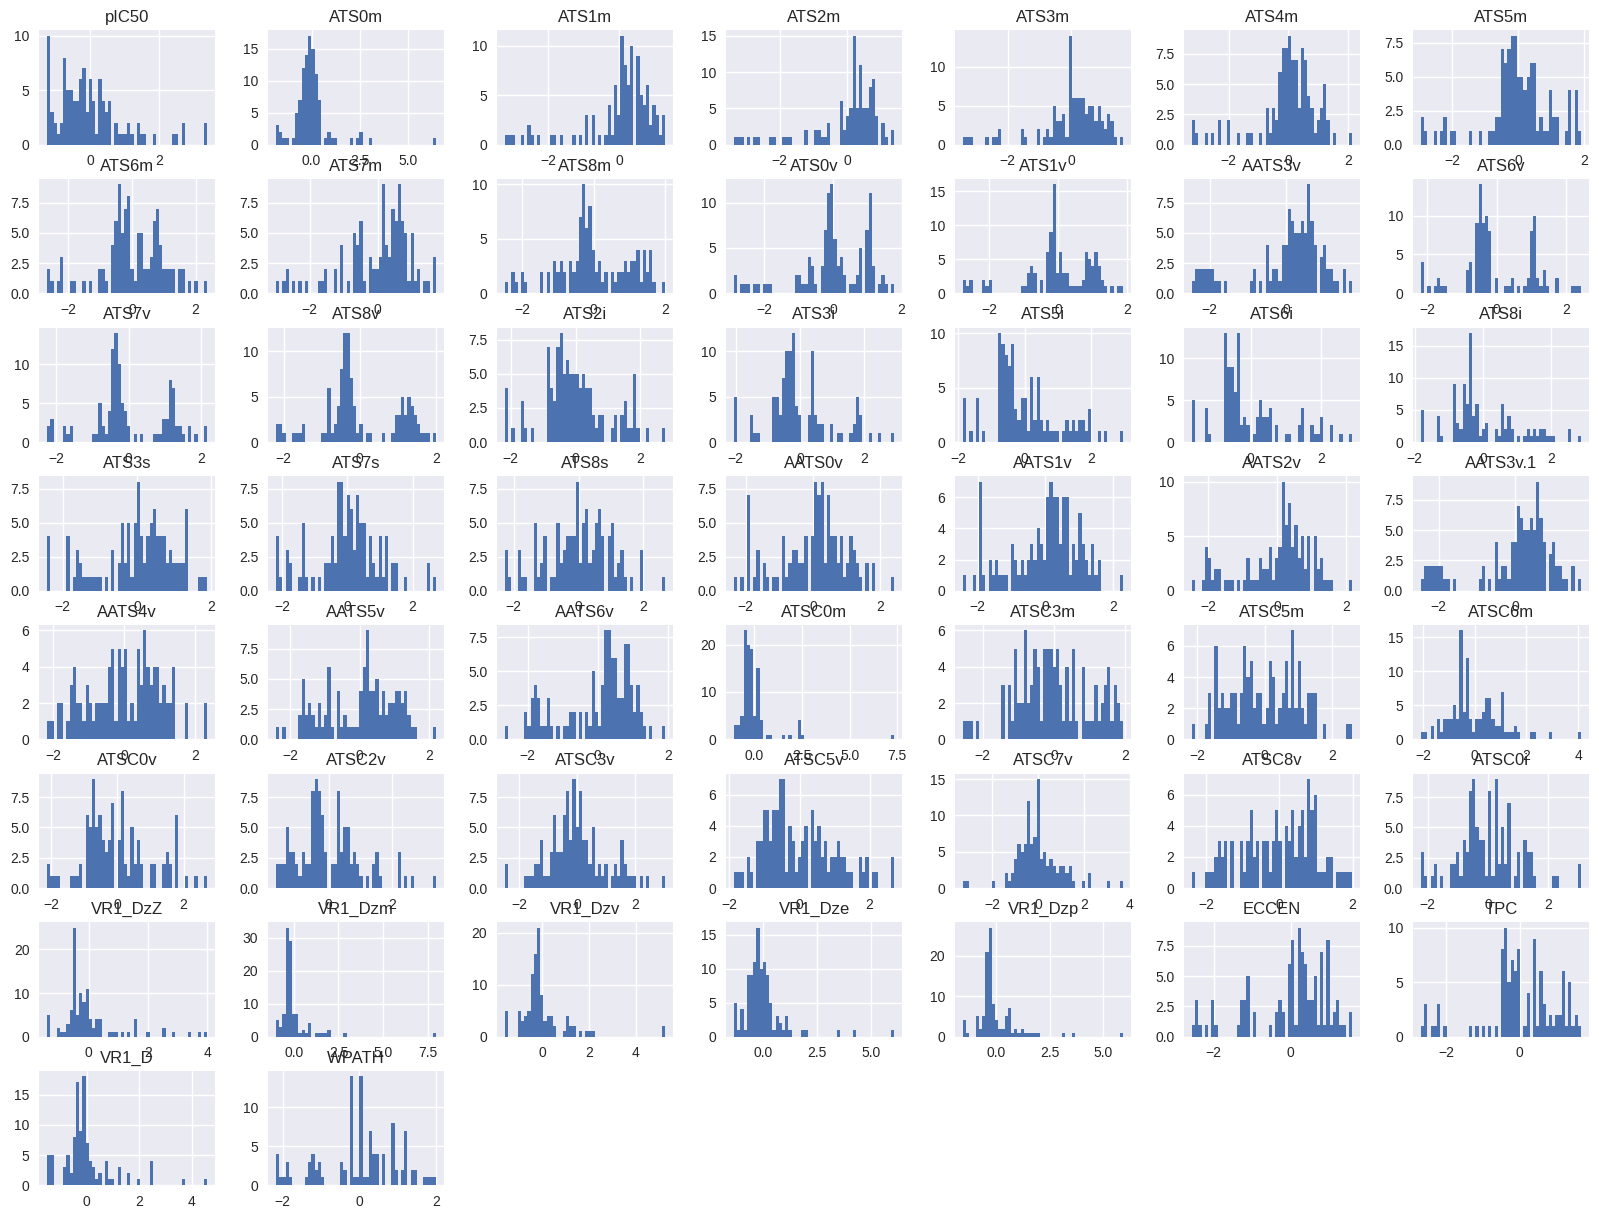

In [ ]:
df2_sc.hist(bins = 50, figsize=(20,15))
plt.show()

** Initiation of Support Vector Regressor**

In [ ]:
model = SVR()

In [ ]:
model.fit(X_train, Y_train)

SVR()

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[ 4.46980696e-01 -5.15495870e-01 -4.43415469e-01 -2.85354639e-01
  4.82131058e-01 -5.06213510e-01  1.52846247e+00 -3.61835187e-01
 -1.16789297e+00 -1.16758713e+00 -4.80702783e-01  1.29573086e-01
 -5.85063137e-01 -6.90931848e-01 -8.03510182e-01  1.86708238e-01
 -3.89844088e-01  6.76148037e-01 -1.14908118e+00 -1.03911110e-01
 -4.46629885e-01  1.47678038e+00 -9.71814015e-01 -3.63490519e-01
 -6.49971240e-01 -6.47440021e-01  4.70277517e-01  1.38514003e-01
 -2.72371978e-01 -4.63391285e-01 -6.68179737e-01 -6.29898916e-01
 -7.46746428e-01  4.89530454e-01 -3.40606774e-01  4.25711813e-01
 -5.61075322e-01 -4.67592797e-01  1.48334512e+00 -1.03911110e-01
 -4.11025647e-01 -1.27536045e+00 -5.12924835e-01  4.42871043e-01
 -1.87890805e-01 -6.17389767e-01  2.55307272e-01  6.65491481e-01
  2.49610717e-01 -7.88653802e-02  1.66349785e-01  6.16647371e-01
 -1.98089120e-02 -1.09943014e+00 -9.70638360e-02  6.25574534e-01
 -6.65258862e-01  6.71054942e-01  4.75947125e-01  8.76990928e-03
 -2.13676092e-01 -2.33840

In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
67,0.360448,0.446981
26,-0.615563,-0.515496
22,-0.410117,-0.443415
31,-0.577801,-0.285355
56,0.382279,0.482131
...,...,...
71,-0.098797,0.206715
14,0.329546,0.405022
92,-0.135998,-0.306036
51,0.245356,0.345434


In [ ]:
len(Y_train_pred)

85

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.5632


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.3669


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.6713


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.5901


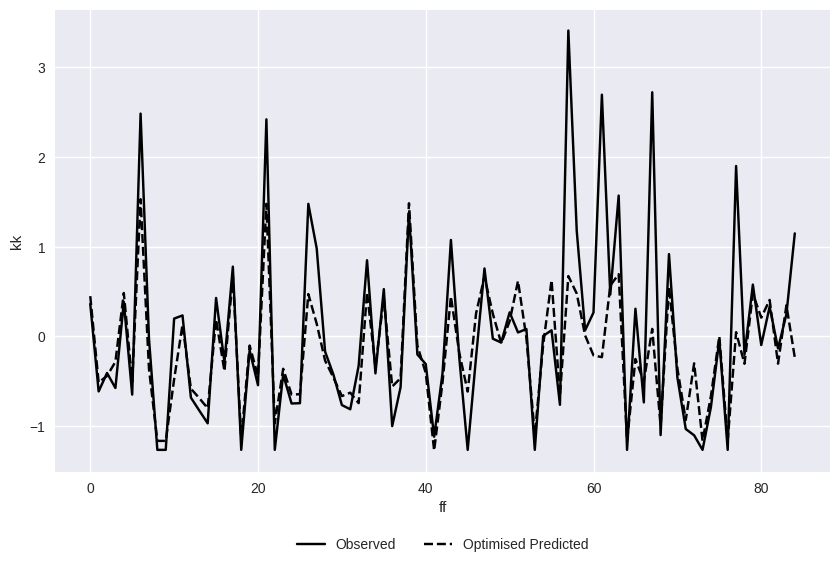

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([ 0.39113533, -0.84068525, -0.37534946, -0.02004266,  0.21622994,
        0.37468569, -0.42756646, -0.69270061, -0.26644353, -0.77703707,
        0.20118583, -0.4078153 , -0.93431245, -1.10311908, -0.73033304,
        0.138514  ,  0.46562958,  0.24064351,  0.40342482, -0.35161451,
       -0.76208078, -0.34021249])

In [ ]:
len(Y_test_pred)

22

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
76,0.236934,0.391135
10,-0.355840,-0.840685
4,-0.201312,-0.375349
99,-0.779144,-0.020043
70,-0.231219,0.216230
66,0.556590,0.374686
30,-0.717109,-0.427566
45,-0.608406,-0.692701
94,3.381814,-0.266444
11,0.045625,-0.777037


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.0607


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.0607


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.5370


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.9080


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))


The EVS is: 0.1379


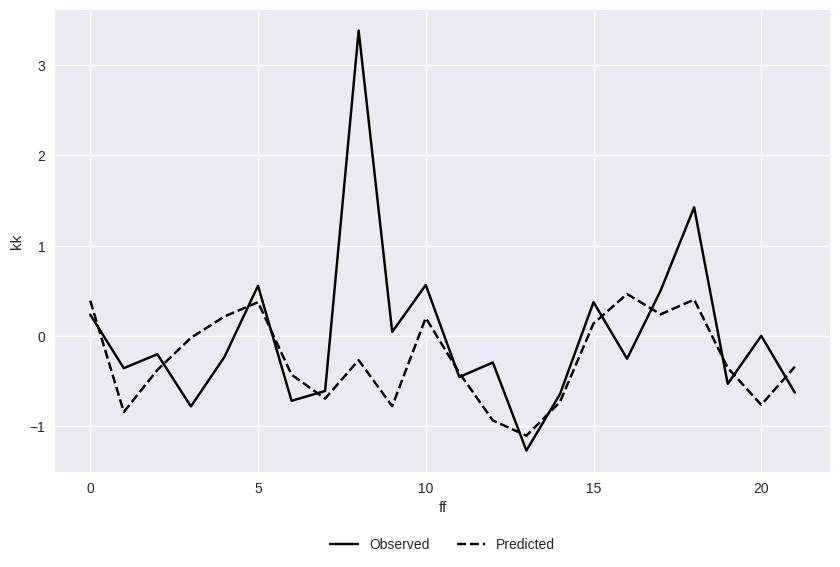

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

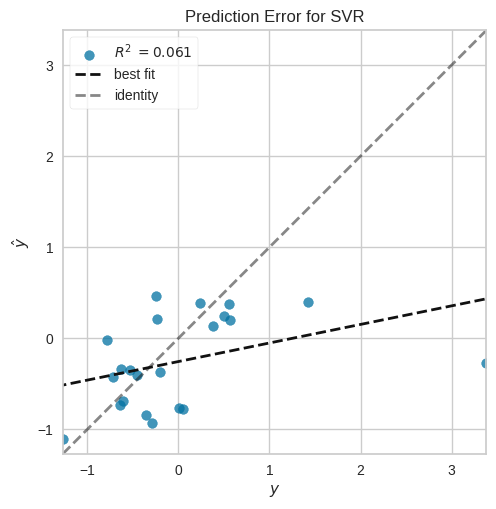

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

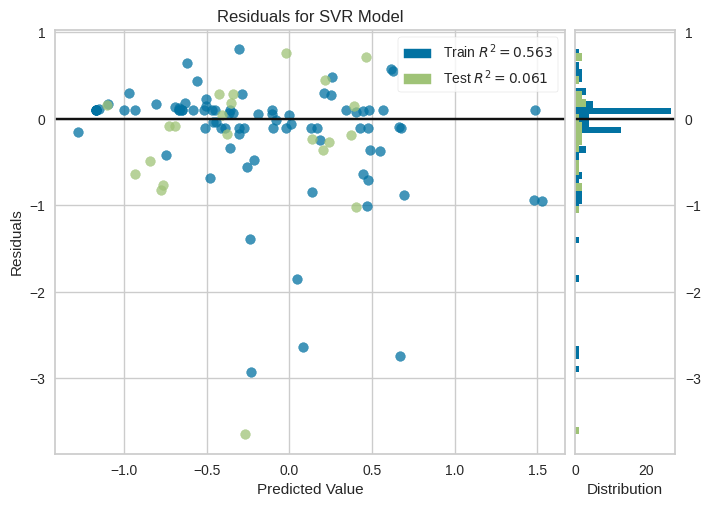

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

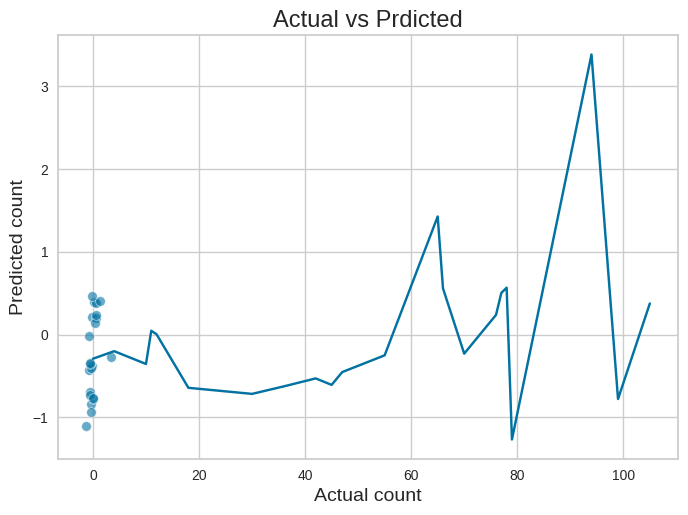

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.06066046108019407

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.91

**Using Different Hyperparametere**

In [ ]:
my_param_grid = {'C':[1, 10, 100], 'gamma':[1,0.1,0.01], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=SVR(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=SVR(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.024 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.008 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.281 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.037 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.460 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.218 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.155 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.488 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([ 0.19350795, -0.17475461, -0.16798838,  0.00144823, -0.08752819,
        0.54629083, -0.33175959, -0.33876199, -0.27774374, -0.19476185,
       -0.03617418, -0.36461587, -0.79767831, -0.58788116, -0.65933494,
        0.87845566,  0.44465832,  0.09190148,  0.34470139, -0.19434959,
       -0.23585683, -0.4595281 ])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
76,0.236934,0.391135,0.193508
10,-0.355840,-0.840685,-0.174755
4,-0.201312,-0.375349,-0.167988
99,-0.779144,-0.020043,0.001448
70,-0.231219,0.216230,-0.087528


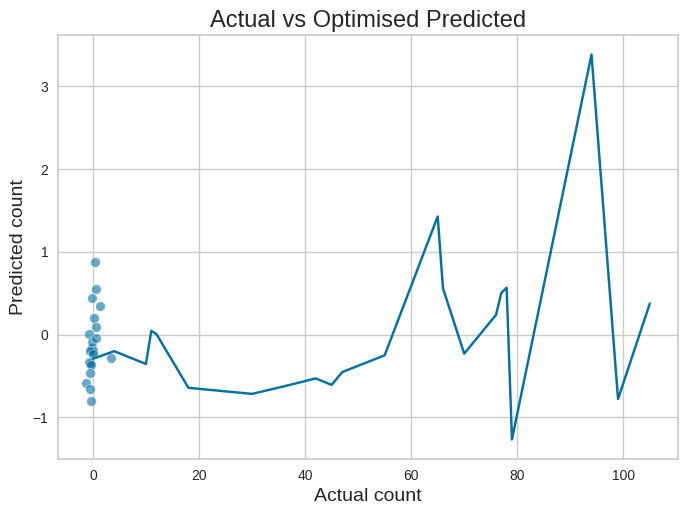

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.0835497276476228

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.89

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The training r_sq is: 0.3127


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.5032


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.8968


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.0987


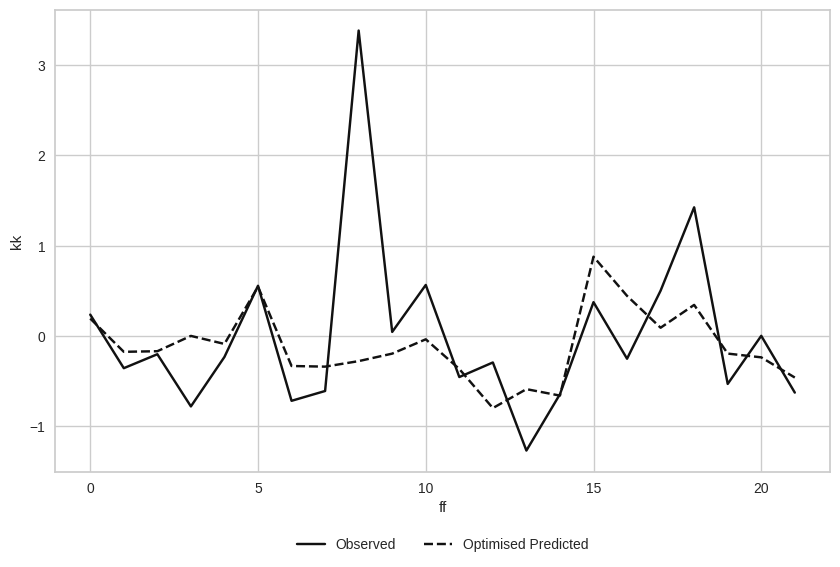

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

**Train with hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([ 2.60138456e-01, -5.15557280e-01, -3.61407482e-01, -4.77508181e-01,
        4.61351561e-01, -5.51690225e-01,  1.56934323e+00, -1.24627747e-01,
       -1.16742260e+00, -1.16761395e+00,  9.67256282e-02,  1.31716113e-01,
       -5.84835904e-01, -7.29025124e-01, -8.71702832e-01,  3.26258486e-01,
       -3.19968805e-01,  6.76572603e-01, -1.16748138e+00, -1.03615284e-01,
       -4.46416978e-01,  1.58187783e+00, -1.16800301e+00, -3.26025448e-01,
       -6.49868222e-01, -6.47514057e-01,  7.67414960e-01,  8.78455662e-01,
       -2.46809342e-01, -3.30556898e-01, -6.89915550e-01, -7.14633151e-01,
       -4.30418964e-01,  7.47604059e-01, -4.13128520e-01,  4.25549887e-01,
       -8.18070245e-01, -4.67720695e-01,  1.28288288e+00, -1.03615284e-01,
       -2.10765460e-01, -1.02188487e+00, -3.13255719e-01,  7.51775359e-01,
       -1.92790127e-01, -1.12166907e+00, -1.30262317e-01,  6.55473724e-01,
        7.18554927e-02, -6.50260188e-02,  1.66295045e-01,  3.75369774e-01,
        1.01557659e-02, -

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
67,0.360448,0.446981,0.260138
26,-0.615563,-0.515496,-0.515557
22,-0.410117,-0.443415,-0.361407
31,-0.577801,-0.285355,-0.477508
56,0.382279,0.482131,0.461352


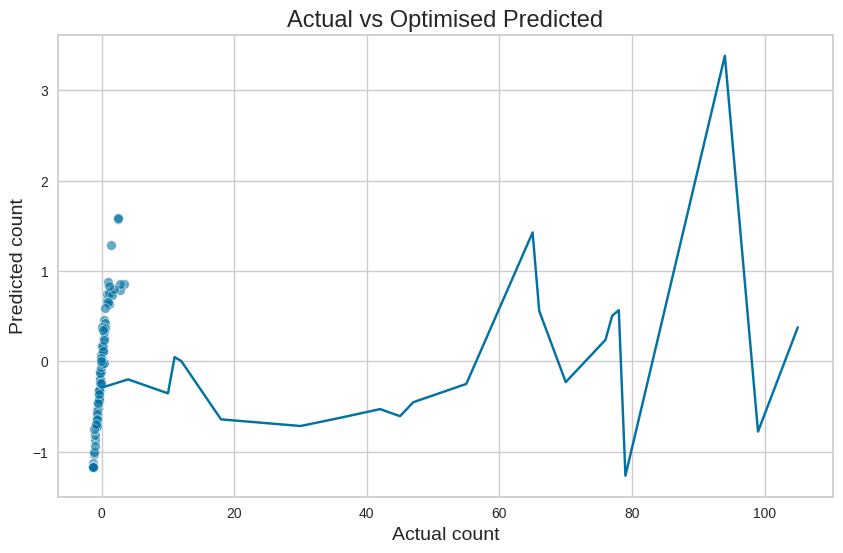

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.8350


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.2300


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.4743


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.7942


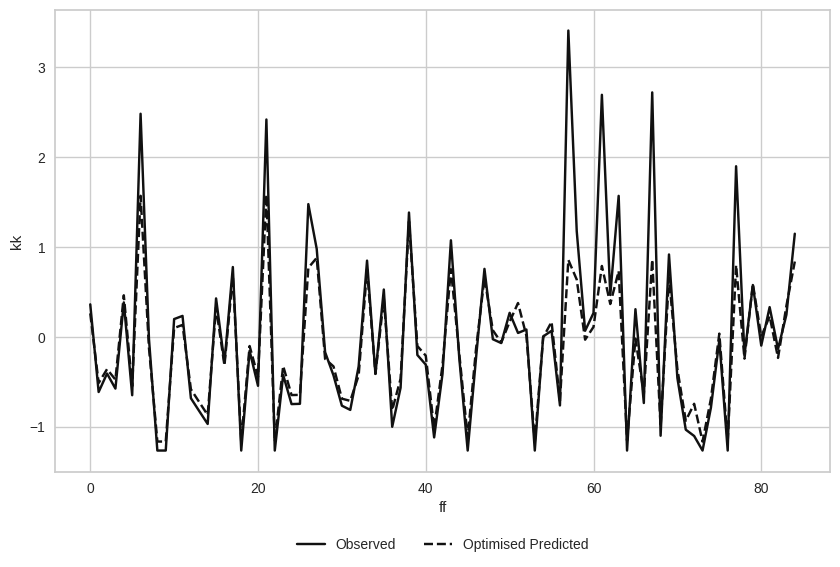

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)